* İçerik Kaynağı:
https://www.youtube.com/watch?v=mTVf7BN7S8w&ab_channel=codebasics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir, verilerin nereden indirileceğini gösterir. Burada "nokta" şu anki dizini ifade eder.
# untar=True zip dosyasının açılmasını sağlar.

228827136/228813984 [==============================] - 100s 0us/step


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

#### Pathlib Modülü
Bu modül, farklı işletim sistemlerine uygun semantik ile dosya sistemi yollarını temsil eden sınıflar sunar. 

Pathlib, dosya sistemine nesne yönelimli bir arabirimdir ve dosya sistemiyle platformdan bağımsız ve pitonik bir şekilde etkileşim kurmak için daha sezgisel bir yöntem sağlar.

🍱 Nesne tabanlı dosya sistemi yolları yönetimidir\
✨ Yeni dosya sistemi yönetimidir\
🧃 Dosya yolu objede ve ona özgü metotlarda saklanır\
📦 Glob modülü içine dahildir\
💎 Özel operatörleri ile hızlı çalışmayı sağlar\
🚶‍♂️ os.path.join yerine / kullanmanız yeterlidir

In [5]:
list(data_dir.glob("*/*.jpg"))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

**Glob modülü**, Python’da belirli bir klasör içindeki dosyaları listelememize yardımcı olan harika bir modüldür. Bu modülü kullanırken filtreleme yaparak, sadece istenilen dosyaların listelenmesini de sağlayabiliyoruz. 

> Önce **Windows Yolu (WindowsPath)** nesnesi oluşturduk. Daha sonra **Glob** ile bu nesne içerisindeki tüm **.jpg** uzantılı dosyalara erişim sağlayabildik. Böylece tüm dizinleri ve alt dizinleri kolayca gözden geçirebildik.

In [6]:
# Toplam görüntü sayısı
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [7]:
# Sadece Gül verilerine erişmek istiyorsak;
roses = list(data_dir.glob("roses/*"))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

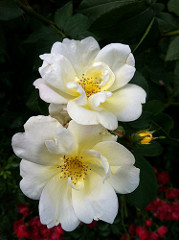

In [8]:
PIL.Image.open(str(roses[0]))

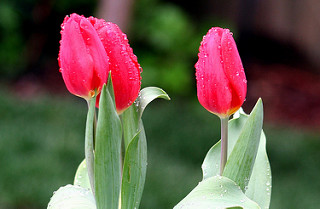

In [9]:
tulips = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[0]))

In [10]:
flower_images_dict = {
    "daisy":list(data_dir.glob("daisy/*")),
    "dandelion":list(data_dir.glob("dandelion/*")),
    "roses":list(data_dir.glob("roses/*")),
    "sunflowers":list(data_dir.glob("sunflowers/*")),
    "tulips":list(data_dir.glob("tulips/*"))
}

In [11]:
flower_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [12]:
flower_labels_dict = {
    "daisy":0,
    "dandelion":1,
    "roses":2,
    "sunflowers":3,
    "tulips":4
}

In [13]:
str(flower_images_dict["roses"][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img = cv2.imread(str(flower_images_dict["roses"][0]))
img.shape

(240, 179, 3)

In [15]:
# görüntülerin boyutlarını eşitliyoruz.
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [16]:
for flower_name, images in flower_images_dict.items():
    print(flower_name)
    print(len(images))

daisy
633
dandelion
898
roses
641
sunflowers
699
tulips
799


In [17]:
X, y = [], []
for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img, (180,180))
        
        X.append(resized_image)
        y.append(flower_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
X[0]

array([[[134, 136, 136],
        [142, 142, 142],
        [146, 146, 146],
        ...,
        [152, 154, 154],
        [153, 153, 153],
        [151, 151, 151]],

       [[132, 134, 134],
        [140, 141, 141],
        [146, 146, 146],
        ...,
        [153, 155, 155],
        [153, 153, 153],
        [150, 150, 150]],

       [[131, 133, 134],
        [138, 140, 140],
        [144, 144, 145],
        ...,
        [152, 154, 154],
        [151, 151, 151],
        [146, 146, 146]],

       ...,

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [125, 126, 130],
        [125, 126, 130],
        [125, 126, 130]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [126, 127, 131],
        [125, 126, 130],
        [125, 126, 130]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [127, 128, 132],
        [126, 128, 131],
        [126, 128, 131]]

In [20]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
len(X_train)

2752

In [23]:
len(X_test)

918

In [24]:
# X[0] ı gözlemlediğimizde değerlerin 0 ile 255 arasında olduğunu gözlemleyebiliriz.
# Bu değer aralığını 0 ile 1 aralığına çekerek ölçeklendirme işlemi gerçekleştirelim.
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
X_train_scaled[0] # 0 aralığında olduğunu gözlemmliyoruz.

array([[[0.37647059, 0.39215686, 0.50588235],
        [0.37647059, 0.39215686, 0.50196078],
        [0.38431373, 0.40392157, 0.50196078],
        ...,
        [0.21568627, 0.23529412, 0.33333333],
        [0.22352941, 0.23137255, 0.3254902 ],
        [0.22745098, 0.23137255, 0.31372549]],

       [[0.38431373, 0.4       , 0.50980392],
        [0.38823529, 0.40784314, 0.50980392],
        [0.39215686, 0.41568627, 0.50980392],
        ...,
        [0.22745098, 0.24313725, 0.34117647],
        [0.23137255, 0.23921569, 0.3372549 ],
        [0.23529412, 0.23529412, 0.33333333]],

       [[0.39215686, 0.41176471, 0.50980392],
        [0.39215686, 0.41176471, 0.50980392],
        [0.39607843, 0.41960784, 0.50980392],
        ...,
        [0.25098039, 0.25882353, 0.35294118],
        [0.24705882, 0.25098039, 0.35294118],
        [0.25098039, 0.24705882, 0.35686275]],

       ...,

       [[0.4745098 , 0.45882353, 0.56470588],
        [0.33333333, 0.32156863, 0.42352941],
        [0.38431373, 0

In [26]:
num_classes = 5     # 5 tane ççek türü üzerinde çalıştığımız için

model = Sequential([
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 23s 262ms/step - loss: 1.3745 - accuracy: 0.4241
Epoch 2/30
86/86 [==============================] - 23s 269ms/step - loss: 1.0626 - accuracy: 0.5759
Epoch 3/30
86/86 [==============================] - 23s 271ms/step - loss: 0.9239 - accuracy: 0.6435
Epoch 4/30
86/86 [==============================] - 23s 273ms/step - loss: 0.7137 - accuracy: 0.7267
Epoch 5/30
86/86 [==============================] - 23s 271ms/step - loss: 0.5113 - accuracy: 0.8172
Epoch 6/30
86/86 [==============================] - 24s 274ms/step - loss: 0.3282 - accuracy: 0.8852
Epoch 7/30
86/86 [==============================] - 23s 270ms/step - loss: 0.1938 - accuracy: 0.9386
Epoch 8/30
86/86 [==============================] - 24s 276ms/step - loss: 0.1239 - accuracy: 0.9633
Epoch 9/30
86/86 [==============================] - 26s 300ms/step - loss: 0.0649 - accuracy: 0.9840
Epoch 10/30
86/86 [==============================] - 25s 290ms/step - loss: 0.0746 - accura

#### SparseCategoricalCrossentropy
* Etiketler ve tahminler (labels and predictions) arasındaki çapraz entropi kaybını hesaplar. İki veya daha fazla etiket sınıfı olduğunda bu çapraz entropi kaybı işlevini kullanın. Etiketlerin tamsayı olması beklenir. Etiketleri tek etkin gösterim kullanarak sağlamak istiyorsanız, lütfen CategoricalCrossentropy kaybını kullanın. y_pred için özellik başına #sınıf kayan nokta değeri ve y_true için özellik başına tek bir kayan nokta değeri olmalıdır. \

Özetle y değerim 0,1,2,3,4 gibi değerlerden oluştuğu için Sparse Categorical Cross Entropy kullanıyoruz.

In [27]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 2s 72ms/step - loss: 3.5684 - accuracy: 0.6133


[3.568445920944214, 0.6132897734642029]

**!!!** Eğitim setinde accuary yani doğruluk değeri %100 iken test setinde %61 civarında doğruluk değeri elde ettiğimizi görüyoruz.
Bu durum **overfitting** olabileceğini bize gösteriyor. Overfitting'i ele almak için veri büyütmeyi kullanmadan önce bazı tahminlerde bulunalım.

In [28]:
predictions = model.predict(X_test_scaled)
predictions

array([[  2.3765476 ,  17.766512  ,   0.6745151 , -14.927826  ,
         -6.8348384 ],
       [ 13.936059  ,  13.513372  ,  10.596981  , -29.809595  ,
         -5.1610656 ],
       [  1.9906685 ,  -8.6775465 ,  17.529028  , -12.373788  ,
          8.514272  ],
       ...,
       [ -5.8209996 , -16.294628  ,  19.217646  ,   7.7033105 ,
         10.914664  ],
       [ 20.811693  ,  -0.36964455,   2.5581405 , -15.256274  ,
         -2.0832973 ],
       [-13.952745  ,   1.2278755 ,   5.2228646 ,   6.7850056 ,
          8.808021  ]], dtype=float32)

In [29]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.0712066e-07, 9.9999976e-01, 3.7760685e-08, 6.3245578e-15,
       2.0690406e-11], dtype=float32)>

In [31]:
# np.argmax : maximum olan ögenin dizinini verir.
np.argmax(np.array([0,78,123,8]))  # 0 - 1 - 2 - 3 şekinde numaralandırılır.

2

In [30]:
np.argmax(score) # 1 numara p

1

In [32]:
y_test[0]

1

**Overfitting olayı için veri çoğaltma işlemlerini gerçekleştirelim.**

Bunun için Tensorfow 'un API 'si var.

In [60]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),   # görüntüleri rastgele çevirir
    layers.experimental.preprocessing.RandomZoom(0.1),   # resmi yakınlaştırıp uzaklaştırma
    #layers.experimental.preprocessing.RandomContrast(0.9) # resmin kontrastını değiştirme
    layers.experimental.preprocessing.RandomRotation(0.1)  # resmi döndürür
])

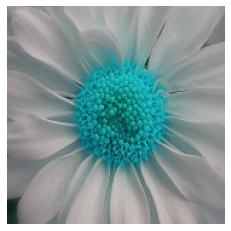

In [61]:
plt.axis("off")
plt.imshow(X[0])

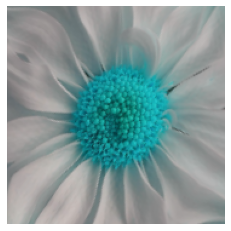

In [63]:
# Bu çiçeği büyütme işlemi uygulayalım
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))  # aşağıda çiçeğin yakınlaştırılmış görüntüsü bulunmaktadır.

* 3600 civarında verimiz var. RandomRotation u birden çok kez çalıştırdığımızda rastgelefarklı bir açıya dönecektir. Bu nedenle kullanışlı bir fonksiyondur.

In [64]:
num_classes = 5

model = Sequential([
    data_augmentation,  # yeni veriler üretiyoruz
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),  # her geçişte 20 nöronu düşürecek bu bize daha iyi genelleme yapacak
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
             )

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 29s 321ms/step - loss: 1.2861 - accuracy: 0.4564
Epoch 2/30
86/86 [==============================] - 27s 315ms/step - loss: 1.0042 - accuracy: 0.6076
Epoch 3/30
86/86 [==============================] - 29s 334ms/step - loss: 0.9013 - accuracy: 0.6552
Epoch 4/30
86/86 [==============================] - 29s 336ms/step - loss: 0.8436 - accuracy: 0.6628
Epoch 5/30
86/86 [==============================] - 28s 330ms/step - loss: 0.7979 - accuracy: 0.6919
Epoch 6/30
86/86 [==============================] - 29s 336ms/step - loss: 0.7774 - accuracy: 0.7089
Epoch 7/30
86/86 [==============================] - 30s 354ms/step - loss: 0.7169 - accuracy: 0.7282
Epoch 8/30
86/86 [==============================] - 30s 353ms/step - loss: 0.6805 - accuracy: 0.7420
Epoch 9/30
86/86 [==============================] - 30s 350ms/step - loss: 0.6554 - accuracy: 0.7551
Epoch 10/30
86/86 [==============================] - 29s 336ms/step - loss: 0.6114 - accura

In [65]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 7s 242ms/step - loss: 0.9272 - accuracy: 0.7320


[0.9271966814994812, 0.7320261597633362]

In [66]:
 tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]